In [ ]:
# r = 'r72'
r = 'r8'

In [2]:
%whos

Variable   Type    Data/Info
----------------------------
r          str     r8


In [3]:
import pandas as pd
import glob

In [8]:
ls ../data/r72/

nc2_transcriptomics_HCMI+CPTAC.input-data.tsv
nc5_transcriptomics_cell-line+CPTAC.input-data.tsv


In [4]:
ls ../data/r8/

AML_proteomics_cell-line+BeatAML.tsv
AML_transcriptomics_cell-line+BeatAML.tsv
colon-adeno_proteomics_cell-line+CPTAC.tsv
glioblastoma_proteomics_cell-line+CPTAC.tsv
lung-adeno_proteomics_cell-line+CPTAC.tsv
nc3a_proteomics_cell-line+CPTAC.tsv
nc3b_proteomics_cell-line+CPTAC.tsv
nc3c_proteomics_cell-line+CPTAC.tsv
nc3d_proteomics_cell-line+CPTAC.tsv
nc4_proteomics_cell-line+CPTAC.tsv
pancreatic-adeno_proteomics_cell-line+CPTAC.tsv


In [ ]:
n_2 = sorted(
    glob.glob(
        '../data/r72/*'), reverse = True)

In [9]:
nc5 = sorted(
    glob.glob(
        '../data/r72/nc5*'), reverse = True)

In [5]:
prot_n = sorted(
    glob.glob(
        '../data/r8/nc*'), reverse = True)

In [53]:
prot_n

['../data/r8/nc4_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3d_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3c_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3b_proteomics_cell-line+CPTAC.tsv',
 '../data/r8/nc3a_proteomics_cell-line+CPTAC.tsv']

#### Joint embedding

In [18]:
nc4df = pd.read_csv(prot_n[0],
                        sep = '\t', index_col = 0)

In [39]:
nc4df.shape

(500, 3830)

In [20]:
nc4df.iloc[:4, :4]

,System,Cancer_type,entrz_prot_2,entrz_prot_14
improve_sample_id,,,,
smpl_id_22,cell-line,pancreatic-adeno,-0.545773,0.861017
smpl_id_41,cell-line,pancreatic-adeno,-1.542713,0.236735
smpl_id_113,cell-line,pancreatic-adeno,-1.167143,-0.579061
smpl_id_117,cell-line,pancreatic-adeno,-0.256381,-0.203389


In [10]:
nc5

['../data/r72/nc5_transcriptomics_cell-line+CPTAC.input-data.tsv']

In [14]:
nc5df = pd.read_csv(nc5[0],
                        sep = '\t', index_col = 0)

In [40]:
nc5df.shape

(827, 19133)

In [31]:
nc5df.iloc[540:548, :4]

,System,Cancer_type,entrz_tran_1,entrz_tran_2
improve_sample_id,,,,
smpl_id_2787,cptac,pancreatic-adeno,5.010000,14.410000
smpl_id_28,cell-line,lung-adeno,0.411426,0.214125
smpl_id_280,cell-line,pancreatic-adeno,0.238787,0.070389
smpl_id_281,cell-line,lung-adeno,4.458119,0.056584
smpl_id_282,cell-line,glioblastoma,0.014355,0.124328
smpl_id_288,cell-line,glioblastoma,1.744161,4.491212
smpl_id_2891,cptac,renal-clear-cell,5.330000,15.850000
smpl_id_2892,cptac,renal-clear-cell,4.960000,15.870000


In [19]:
nc4df.Cancer_type.unique()

array(['pancreatic-adeno', 'glioblastoma', 'colon-adeno', 'lung-adeno'],
      dtype=object)

In [16]:
nc5df.Cancer_type.unique()

array(['glioblastoma', 'colon-adeno', 'pancreatic-adeno', 'lung-adeno',
       'renal-clear-cell'], dtype=object)

In [ ]:
# obersve: No renal cell for transcriptomics

In [24]:
nc4df.System.value_counts()

System
cptac        407
cell-line     93
Name: count, dtype: int64

In [21]:
nc4df.Cancer_type.value_counts()

Cancer_type
lung-adeno          143
colon-adeno         125
pancreatic-adeno    123
glioblastoma        109
Name: count, dtype: int64

In [23]:
nc5df.System.value_counts()

System
cptac        566
cell-line    261
Name: count, dtype: int64

In [22]:
nc5df.Cancer_type.value_counts()

Cancer_type
pancreatic-adeno    195
lung-adeno          188
colon-adeno         165
glioblastoma        152
renal-clear-cell    127
Name: count, dtype: int64

In [34]:
nc4df_tran = nc5df[nc5df.Cancer_type != 'renal-clear-cell']

In [ ]:
isect = src.columns.intersection(dst.columns)

In [ ]:
, axis=0, join='inner'

In [45]:
nc4_tran_prot = pd.concat([nc4df_tran, nc4df.iloc[:, 2:]], axis=1, join='inner')

In [46]:
22963 - 19133

3830

In [ ]:
nc4_tran_prot

In [49]:
nc4_tran_prot.System.value_counts()

System
cptac        406
cell-line     90
Name: count, dtype: int64

In [50]:
nc4_tran_prot.Cancer_type.value_counts()

Cancer_type
lung-adeno          142
colon-adeno         123
pancreatic-adeno    122
glioblastoma        109
Name: count, dtype: int64

In [51]:
nc4_tran_prot[nc4_tran_prot.System == 'cell-line'].Cancer_type.value_counts()

Cancer_type
lung-adeno          36
colon-adeno         27
pancreatic-adeno    17
glioblastoma        10
Name: count, dtype: int64

In [55]:
ls ../data/r8/

AML_proteomics_cell-line+BeatAML.tsv
AML_transcriptomics_cell-line+BeatAML.tsv
colon-adeno_proteomics_cell-line+CPTAC.tsv
glioblastoma_proteomics_cell-line+CPTAC.tsv
lung-adeno_proteomics_cell-line+CPTAC.tsv
nc3a_proteomics_cell-line+CPTAC.tsv
nc3b_proteomics_cell-line+CPTAC.tsv
nc3c_proteomics_cell-line+CPTAC.tsv
nc3d_proteomics_cell-line+CPTAC.tsv
nc4_proteomics_cell-line+CPTAC.tsv
pancreatic-adeno_proteomics_cell-line+CPTAC.tsv


In [56]:
nc4_tran_prot.to_csv('../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv',
                    sep = '\t')

In [57]:
ls ../data/r8/*tran-prot*

../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv


In [58]:
nc4_tran_prot_pth = sorted(
                    glob.glob(
                    '../data/r8/*tran-prot*'), reverse = True)

In [59]:
nc4_tran_prot_pth

['../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv']

#### Tybalt, continue

In [7]:
import math
import collections

import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Layer
from tensorflow.keras import metrics, optimizers
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import Callback
import tensorflow.compat.v1.keras.backend as K
tf.compat.v1.disable_eager_execution()

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [11]:
# VAE functions
def compute_latent(x):
    mu, sigma = x
    batch = K.shape(mu)[0]
    dim = K.shape(mu)[1]
    eps = K.random_normal(shape=(batch,dim), mean=0., stddev=1.0 )
    return mu + K.exp(sigma/2)*eps

class CustomVariationalLayer(Layer):
    """
    Define a custom layer
    """
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)

    def vae_loss(self, x_input, x_decoded):
        reconstruction_loss = original_dim * metrics.binary_crossentropy(
            x_input, x_decoded)
        kl_loss = - 0.5 * K.sum(1 + z_log_var_encoded - K.square(z_mean_encoded) - 
                                K.exp(z_log_var_encoded), axis=-1)
        return K.mean(reconstruction_loss + (K.get_value(beta) * kl_loss))

    def call(self, inputs):
        x = inputs[0]
        x_decoded = inputs[1]
        loss = self.vae_loss(x, x_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
class WarmUpCallback(Callback):
    def __init__(self, beta, kappa):
        self.beta = beta
        self.kappa = kappa

    def on_epoch_end(self, epoch, logs={}):
        if K.get_value(self.beta) <= 1:
            K.set_value(self.beta, K.get_value(self.beta) + self.kappa)

In [13]:
# Loss plot visualization to determine degree of model fitting
def plot_loss(loss_dict, cancer, modality, systems, latent_dim, train_file):

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot loss values
    plt.plot(loss_dict['vs0'], marker='o', linestyle='-', color='b')

    # Add a grid
    plt.grid(True, linestyle='--', alpha=0.6)

    # Add titles and labels
    plt.title(cancer+' '+modality+' '+systems+' VAE Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)

    # Annotation for epochs and latent dimension
    plt.annotate('Samples: {}'.format(
        len(train_file))+'\nLatent dim: '+str(
        latent_dim)+'\nRaw features: {}'.format(len(train_file.columns)), 
                 xy=(0.7, 0.3), xycoords='axes fraction', 
                 bbox=dict(boxstyle='round, pad=0.5', fc='white', ec='black'),
                 fontsize=12)

    # Save the plot
    plt.savefig(#'loss_plots/'+data_type+'_vae_loss.png'
               '../results/r8/tybalt/'+cancer+'_'+modality+'_'+
                         systems+'_'+str(latent_dim)+'-ltnt-dim_'+
                         str(epochs)+'-epchs_loss.png')
    # plt.close()  # Close the figure - not for interactive devel / demo

../data/r8/nc4_tran-prot_cell-line+CPTAC.tsv
Train on 496 samples
Epoch 1/12
496/496 [==============================] - 1s 1ms/sample - loss: 15106.8510
Epoch 2/12
496/496 [==============================] - 0s 545us/sample - loss: 13085.2785
Epoch 3/12
496/496 [==============================] - 0s 546us/sample - loss: 11851.1827
Epoch 4/12
496/496 [==============================] - 0s 552us/sample - loss: 11175.4493
Epoch 5/12
496/496 [==============================] - 0s 555us/sample - loss: 10880.7726
Epoch 6/12
496/496 [==============================] - 0s 557us/sample - loss: 10661.1424
Epoch 7/12
496/496 [==============================] - 0s 544us/sample - loss: 10559.7898
Epoch 8/12
496/496 [==============================] - 0s 549us/sample - loss: 10462.5665
Epoch 9/12
496/496 [==============================] - 0s 544us/sample - loss: 10449.0839
Epoch 10/12
496/496 [==============================] - 0s 550us/sample - loss: 10405.0087
Epoch 11/12
496/496 [========================

/Users/karlberb/miniforge3/envs/py310tf210/lib/python3.10/site-packages/keras/engine/training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


VAE done, latent object and loss plot written to disk


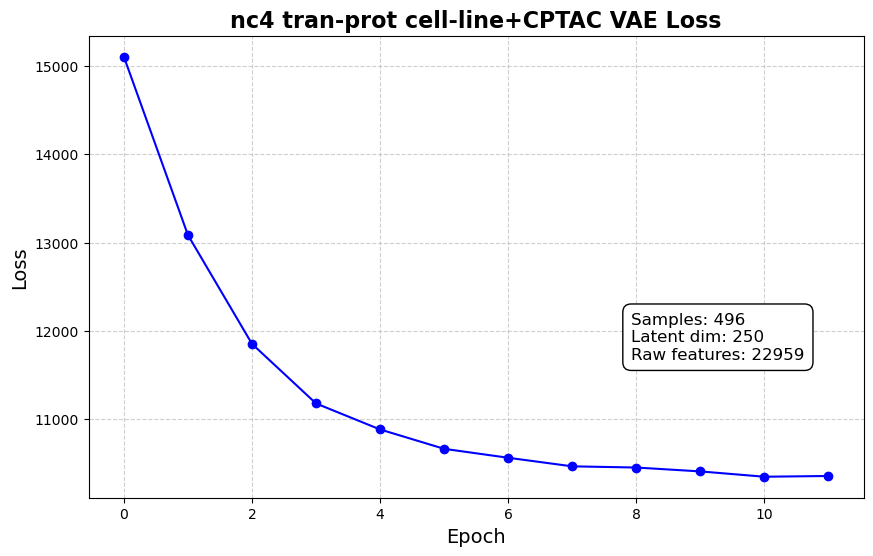

In [60]:
epochs = 12
# for fl_pth in n_2:
# for fl_pth in prot_n:
for fl_pth in nc4_tran_prot_pth:
    print(fl_pth)
    cancer = fl_pth.split('_')[0].split('/')[-1]
    modality = fl_pth.split('_')[1]
    systems = fl_pth.split('_')[2].split('.')[0]
    latent_header_prefix = modality[:4]
    train_file = pd.read_csv(fl_pth,
                        sep = '\t', index_col = 0)
    sys_lbls = train_file.System
    cncr_lbls = train_file.Cancer_type
    train_file = train_file.iloc[:, 2:]

    # Normalize
    scaler = MinMaxScaler()
    train_file = pd.DataFrame(
        scaler.fit_transform(train_file),
        columns=train_file.columns,
        index=train_file.index)
    # break
    # Variational auto-encoder, Tybalt
    loss_dict = {}
    vs_list = ['vs0']
    validation_split = vs_list[0]
    
    features = train_file.columns
    
    original_dim = len(features)
    feature_dim = len(features)
    latent_dim = 250
    batch_size = 50
    
    encoder_inputs = keras.Input(shape=(feature_dim,))
    z_mean_dense_linear = layers.Dense(
        latent_dim, kernel_initializer='glorot_uniform', name="encoder_1")(encoder_inputs)
    z_mean_dense_batchnorm = layers.BatchNormalization()(z_mean_dense_linear)
    z_mean_encoded = layers.Activation('relu')(z_mean_dense_batchnorm)
    
    z_log_var_dense_linear = layers.Dense(
        latent_dim, kernel_initializer='glorot_uniform', name="encoder_2")(encoder_inputs)
    z_log_var_dense_batchnorm = layers.BatchNormalization()(z_log_var_dense_linear)
    z_log_var_encoded = layers.Activation('relu')(z_log_var_dense_batchnorm)
    
    latent_space = layers.Lambda(
        compute_latent, output_shape=(
            latent_dim,), name="latent_space")([z_mean_encoded, z_log_var_encoded])
    
    decoder_to_reconstruct = layers.Dense(
        feature_dim, kernel_initializer='glorot_uniform', activation='sigmoid')
    decoder_outputs = decoder_to_reconstruct(latent_space)
    
    learning_rate = 0.0005
    
    kappa = 1
    beta = K.variable(0)
    
    adam = optimizers.Adam(learning_rate=learning_rate)
    vae_layer = CustomVariationalLayer()([encoder_inputs, decoder_outputs])
    vae = Model(encoder_inputs, vae_layer)
    vae.compile(optimizer=adam, loss=None, loss_weights=[beta])
    
    history = vae.fit(train_file,
                epochs=epochs,
                      batch_size=batch_size,
                      shuffle=True,
                      callbacks=[WarmUpCallback(beta, kappa)],
                      verbose=1)
    loss_dict[validation_split] = history.history['loss']
    
    encoder = Model(encoder_inputs, z_mean_encoded)
    latent_object = pd.DataFrame(
        encoder.predict(train_file),
        index=train_file.index
    )
    latent_object.index.name = train_file.index.name
    # break
    # Convert latent object headers to dtype specific strings for input to transformer
    new_column_headers = []
    for column_header in latent_object.columns:
        # latent_header_prefix
        new_column_header = latent_header_prefix+'_' + str(column_header)
        new_column_headers.append(new_column_header)
    latent_object.columns = new_column_headers
    latent_object.insert(0, 'Cancer_type', cncr_lbls)
    latent_object.insert(0, 'System', sys_lbls)
    # break
    latent_object.to_csv('../results/r8/tybalt/'+cancer+'_'+modality+'_'+
                         systems+'.'+str(latent_dim)+'-ltnt-dim_'+
                         str(epochs)+'-epchs.tsv', sep = '\t')
    plot_loss(loss_dict, cancer, modality, systems, latent_dim, train_file)
    print('VAE done, latent object and loss plot written to disk')
    # break

In [ ]:
# Proteomics run notes
    # nc3x key is in dta_ldr
    # not necessary if labels are re-appended to latent space